# **Mini-Project Assignment (SC1015)**


## Problem Statement(s): 
- **1. What are the main factors affecting the happiness score and rank each year?**
- **2. Extract Singapore from the Data Information, finding out how is comparison against other countries (Top & Bottom Country)?**

Group Name (SC17):
- Low Yong Keng (U2122645L)
- Teng Yen Fong (U2121123A)
- Tan Hong Meng (U2120876F)


---

In [1]:
import numpy as np

import pandas as pd
import os

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as seabornInstance 

import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
from sklearn import datasets, metrics,linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.feature_selection import f_regression

###  Below Represent the Year of **2015** of Data Information:

In [2]:
url = 'https://raw.githubusercontent.com/ResortWorldTekong/Mini-Project/main/2015.csv'
df2015 = pd.read_csv(url)

# renaming of the columns use for each data variables
colums_usage = ['Rank', 'Countries', 'HPS', 'GDP', 'Support', 'Health', 'Freedom', 'Generosity', 'Corruption']
# drop the unnecessary data columns
df2015.drop(['Region','Standard Error', 'Dystopia Residual'], axis = 1, inplace = True) 
df2015.columns = ['Countries', 'Rank', 'HPS', 'Support', 'GDP', 'Health', 'Freedom', 'Generosity', 'Corruption']
df2015['Year'] = 2015
df2015

,Countries,Rank,HPS,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,2015
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2015
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2015


###  Below Represent the Year of **2016** of Data Information:

In [3]:
url1 = 'https://raw.githubusercontent.com/ResortWorldTekong/Mini-Project/main/2016.csv'
df2016 = pd.read_csv(url1)

# drop the unnecessary data columns
df2016.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis = 1, inplace = True)
df2016.columns = ['Countries', 'Rank', 'HPS', 'GDP', 'Support', 'Health', 'Freedom', 'Generosity', 'Corruption']
df2016['Year'] = 2016
df2016

,Countries,Rank,HPS,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016
...,...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2016
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2016
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2016
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,2016


###  Below Represent the Year of **2017** of Data Information:

In [4]:
url2 = 'https://raw.githubusercontent.com/ResortWorldTekong/Mini-Project/main/2017.csv'
df2017 = pd.read_csv(url2)

# drop the unnecessary data columns
df2017.drop(['Whisker.high','Whisker.low', 'Dystopia.Residual'], axis=1, inplace = True)
df2017.columns = ['Countries', 'Rank', 'HPS', 'GDP', 'Support', 'Health', 'Freedom', 'Generosity', 'Corruption']
df2017['Year'] = 2017
df2017

,Countries,Rank,HPS,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,2017
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,2017
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,2017
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,2017


###  Below Represent the Year of **2018** of Data Information:

In [5]:
url3 = 'https://raw.githubusercontent.com/ResortWorldTekong/Mini-Project/main/2018.csv'
df2018 = pd.read_csv(url3)
df2018.columns = ['Rank', 'Countries', 'HPS', 'GDP', 'Support', 'Health', 'Freedom', 'Generosity', 'Corruption']
df2018['Year'] = 2018
df2018

,Rank,Countries,HPS,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018


###  Below Represent the Year of **2019** of Data Information:

In [6]:
url4 = 'https://raw.githubusercontent.com/ResortWorldTekong/Mini-Project/main/2019.csv'
df2019 = pd.read_csv(url4)
df2019.columns = ['Rank', 'Countries', 'HPS', 'GDP', 'Support','Health', 'Freedom', 'Generosity', 'Corruption']
df2019['Year'] = 2019
df2019

,Rank,Countries,HPS,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


###  Below Represent the Year of **2020** of Data Information:

In [7]:
url6 = 'https://raw.githubusercontent.com/ResortWorldTekong/Mini-Project/main/2020.csv'
df2020 = pd.read_csv(url6)

# drop the unnecessary data columns
df2020.drop(['Regional indicator','Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual', 'Healthy life expectancy'], axis=1, inplace = True)
df2020.columns = ['Rank', 'Countries', 'HPS', 'GDP', 'Support', 'Health', 'Freedom', 'Generosity', 'Corruption']
df2020['Year'] = 2020
df2020

,Rank,Countries,HPS,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2020
1,2,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2020
2,3,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2020
3,4,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2020
4,5,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2020
...,...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2020
149,150,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,2020
150,151,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,2020
151,152,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,2020


###  Below Represent the Year of **2021** of Data Information:

In [8]:
url7 = 'https://raw.githubusercontent.com/ResortWorldTekong/Mini-Project/main/2021.csv'
df2021 = pd.read_csv(url7)

# drop the unnecessary data columns
df2021.drop(['Regional indicator','Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual', 'Healthy life expectancy'], axis=1, inplace = True)
df2021.columns = ['Rank', 'Countries', 'HPS', 'GDP', 'Support', 'Health', 'Freedom', 'Generosity', 'Corruption']
df2021['Year'] = 2021
df2021

,Rank,Countries,HPS,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,2021
1,2,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2021
2,3,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2021
3,4,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2021
4,5,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2021
...,...,...,...,...,...,...,...,...,...,...
144,145,Lesotho,3.512,0.451,0.731,0.007,0.405,0.103,0.015,2021
145,146,Botswana,3.467,1.099,0.724,0.340,0.539,0.027,0.088,2021
146,147,Rwanda,3.415,0.364,0.202,0.407,0.627,0.227,0.493,2021
147,148,Zimbabwe,3.145,0.457,0.649,0.243,0.359,0.157,0.075,2021


In [9]:
target = ['Top','Top-Mid', 'Low-Mid', 'Low' ]
target_n = [4, 3, 2, 1]


df2015["target"] = pd.qcut(df2015['Rank'], len(target), labels=target)
df2015["target_n"] = pd.qcut(df2015['Rank'], len(target), labels=target_n)

df2016["target"] = pd.qcut(df2016['Rank'], len(target), labels=target)
df2016["target_n"] = pd.qcut(df2016['Rank'], len(target), labels=target_n)

df2017["target"] = pd.qcut(df2017['Rank'], len(target), labels=target)
df2017["target_n"] = pd.qcut(df2017['Rank'], len(target), labels=target_n)

df2018["target"] = pd.qcut(df2018['Rank'], len(target), labels=target)
df2018["target_n"] = pd.qcut(df2018['Rank'], len(target), labels=target_n)

df2019["target"] = pd.qcut(df2019['Rank'], len(target), labels=target)
df2019["target_n"] = pd.qcut(df2019['Rank'], len(target), labels=target_n)

df2020["target"] = pd.qcut(df2020['Rank'], len(target), labels=target)
df2020["target_n"] = pd.qcut(df2020['Rank'], len(target), labels=target_n)

df2021["target"] = pd.qcut(df2021['Rank'], len(target), labels=target)
df2021["target_n"] = pd.qcut(df2021['Rank'], len(target), labels=target_n)

###  Combine all Dataset of Each Year (2015 - 2021) into 1 single Data Information:

In [10]:
finaldata = df2015.append([df2016, df2017, df2018, df2019, df2020, df2021])
finaldata.isnull().any()
finaldata.sort_values(by = ["Rank"], inplace = True, ascending = True)
finaldata = finaldata.reset_index(drop=True)
finaldata.Corruption.fillna((finaldata.Corruption.mean()), inplace = True)

finaldata.columns = finaldata.columns.str.replace(".", "", regex=True)
finaldata.columns = finaldata.columns.str.replace(" ", "_", regex=True)
finaldata.replace(' ', '_', regex=True)
finaldata = finaldata.reset_index(drop = True)

finaldata

,Countries,Rank,HPS,Support,GDP,Health,Freedom,Generosity,Corruption,Year,target,target_n
0,Switzerland,1,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015,Top,4
1,Finland,1,7.7690,1.587000,1.340000,0.986000,0.596000,0.153000,0.393000,2019,Top,4
2,Denmark,1,7.5260,1.163740,1.441780,0.795040,0.579410,0.444530,0.361710,2016,Top,4
3,Finland,1,7.8087,1.499526,1.285190,0.961271,0.662317,0.159670,0.477857,2020,Top,4
4,Norway,1,7.5370,1.533524,1.616463,0.796667,0.635423,0.362012,0.315964,2017,Top,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Syria,156,3.0060,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790,2015,Low,1
1080,South Sudan,156,2.8530,0.575000,0.306000,0.295000,0.010000,0.202000,0.091000,2019,Low,1
1081,Burundi,157,2.9050,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270,2015,Low,1
1082,Burundi,157,2.9050,0.234420,0.068310,0.157470,0.043200,0.094190,0.202900,2016,Low,1


In [11]:
print("Data type : ", type(finaldata))
print("Data dims : ", finaldata.shape)

print(finaldata.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1084, 12)
Countries       object
Rank             int64
HPS            float64
Support        float64
GDP            float64
Health         float64
Freedom        float64
Generosity     float64
Corruption     float64
Year             int64
target        category
target_n      category
dtype: object


In [12]:
finaldata.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1084.0,77.950185,44.766196,1.000,39.000000,78.000000,117.000000,158.000000
HPS,1084.0,5.413460,1.118595,2.523,4.571000,5.385150,6.216125,7.842000
Support,1084.0,1.028984,0.358003,0.000,0.806570,1.068475,1.321079,1.690420
GDP,1084.0,0.938896,0.386160,0.000,0.669930,0.996010,1.240385,2.096000
Health,1084.0,0.611090,0.248616,0.000,0.436887,0.643840,0.799323,1.141000
Freedom,1084.0,0.430544,0.152699,0.000,0.329800,0.448940,0.552335,0.724000
Generosity,1084.0,0.179992,0.113934,0.000,0.092000,0.160325,0.246114,0.838075
Corruption,1084.0,0.156436,0.124458,0.000,0.064000,0.119152,0.217103,0.819710
Year,1084.0,2017.968635,1.995594,2015.000,2016.000000,2018.000000,2020.000000,2021.000000


# Part 1 - Problem Statement:

The analysis/statistics of Happiness Index Report across the World:

- 1. What are the overall analysis of Happiness Report from all the Countries?
- 2. What are the main factors affecting the happiness score and rank each year?

## Base on the Question 1: 

## The Distribution of Happiness Index Score:
> Using the Histogram (with KDE) & Boxplot to check the Distribution of the Happiness Index Score

In [13]:
print("The Statistics of Happiness Index Score:")

HPS_Score = pd.DataFrame(finaldata["HPS"])
HPS_Score.describe().round(2).T

The Statistics of Happiness Index Score:


,count,mean,std,min,25%,50%,75%,max
HPS,1084.0,5.41,1.12,2.52,4.57,5.39,6.22,7.84


In [14]:
fig = px.histogram(finaldata["HPS"], marginal="box", x = "HPS")
fig.update_traces(opacity=0.7, marker_line_color='rgb(255,255,255)', marker_line_width = 2.5)
fig.update_layout(showlegend = False,
                  title="Distribution of Happiness Score Index (skew: {:.3f})".format(finaldata["HPS"].skew()),
                  width = 800)
fig.show()

###  The Statistics of Distribution of Quantiles (Q1, Q2, and Q3) for HPS [Happiness Score] & Year:

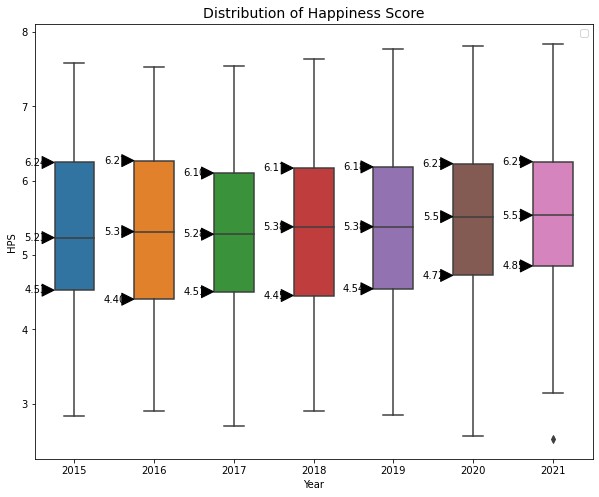

In [15]:
fig = plt.figure(figsize=(10, 8))
plt.title('Distribution of Happiness Score', fontsize=14)
plt.legend(labels=["Happiness Score", "Year"])

box_width = 0.5
i = 0
ax = seabornInstance.boxplot(data = finaldata, x = 'Year', y = 'HPS', width = box_width)
for name, group in finaldata.groupby('Year'):
    Q1, Q2, Q3 = group['HPS'].quantile([0.25, 0.50, 0.75])
    for q in (Q1, Q2, Q3):
        x = i - (box_width / 2)
        y = q
        ax.annotate('%.2f' % q, (x, y),
                    xytext=(x - 0.1, y), textcoords = 'data',
                    arrowprops = dict(facecolor = 'black', shrink = 0.05),
                    va = 'center', ha = 'right')
    
    i+=1

In [16]:
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                        })

###  World Map representation base on the Happiness Score with Countries:

> There is also ranking of the Happiness Score in the World Map

In [17]:
happiness_rank = dict(type = 'choropleth', 
           locations = finaldata['Countries'],
           locationmode = 'country names',
           z = finaldata['Rank'], 
           text = finaldata['Countries'],
           colorscale = 'greens',
           autocolorscale = False,
           reversescale = True,
           marker_line_color='darkgray',
           marker_line_width=0.5)
layout = dict(title = 'The Happiness Rank in the representation of World Map.', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
world_map_1 = go.Figure(data = [happiness_rank], layout = layout)
iplot(world_map_1)

###  Statistics of most Happiest to Unhappiest Country (Top & Below 5):
> 1. 1st color represent **Gold**, 2nd represent **Silver**, and 3rd represent **Brown** in the ranking system (Happiness Score)

In [18]:
def color_rank(value):
    if value == 1:
        color = 'gold'
    elif value == 2:
        color = 'silver'
    elif value == 3:
        color = 'brown'
    else:
        color = 'default'
    return 'background-color: %s' % color


def highlight_max(data, color='gold'):
    attr = 'background-color: {}'.format(color)
    data_val = data.astype(float)
    if data_val.ndim == 1: 
        is_max = data_val == data_val.max()
        return [attr if v else '' for v in is_max]
    else:  
        is_max = data_val == data_val.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index = data_val.index, columns=data_val.columns)

In [19]:
dvp_rank = finaldata.pivot(index='Countries', columns='Year', values=['Rank'])

dvp_rank = dvp_rank.dropna(axis = 0)
dvp_rank['Average'] = dvp_rank.mean(axis = 1)
dvp_rank = dvp_rank.sort_values(by = ['Average'], ascending=True)
dvp_rank['Current Rank'] = range(1, len(dvp_rank)+1)
dvp_rank.style.applymap(color_rank, subset = ['Rank', 'Current Rank'])

In [20]:
dvp_score = finaldata.pivot_table(index='Countries', columns='Year', values=['HPS'])

dvp_score = dvp_score.reset_index()  

dvp_score = dvp_score.dropna(axis = 0)
dvp_score['Average'] = dvp_score.mean(axis = 1, numeric_only=True)
dvp_score = dvp_score.sort_values(by = ['Average'], ascending = False)

dvp_score['Rank'] = range(1, len(dvp_score) + 1)
dvp_score = dvp_score.set_index(['Countries', 'Rank'])
dvp_score.style.apply(highlight_max)

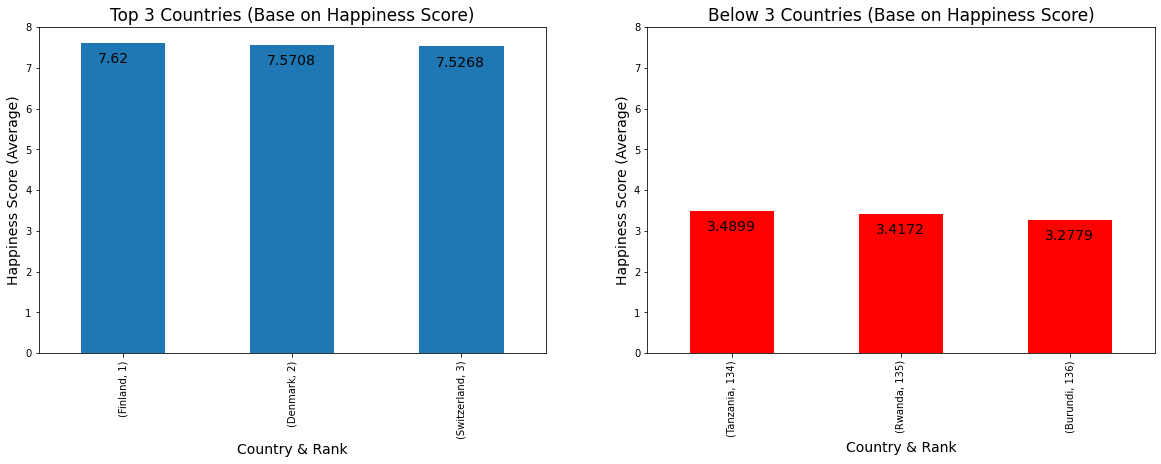

In [21]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.title('Top 3 Countries (Base on Happiness Score)', fontsize = 17, y = 1)
dvp_score[0:3]['Average'].plot(kind = 'bar')
plt.xlabel('Country & Rank', fontsize = 14)
plt.yticks(np.arange(0, 9, step = 1))
for index, data in enumerate(np.round(dvp_score[0:3]['Average'], 4)):
    plt.text(x=index-0.15 , y =data-0.5 , s=f"{data}" , fontdict = dict(fontsize = 14))
plt.ylabel('Happiness Score (Average)', fontsize = 14)

plt.subplot(1, 2, 2)    
plt.title('Below 3 Countries (Base on Happiness Score)', fontsize = 17, y = 1)
dvp_score[-4:-1]['Average'].plot(kind = 'bar', color = 'red')
plt.xlabel('Country & Rank', fontsize = 14)
plt.yticks(np.arange(0, 9, step = 1))
for index, data in enumerate(np.round(dvp_score[-4:-1]['Average'], 4)):
    plt.text(x = index-0.15 , y = data-0.5 , s=f"{data}" , fontdict = dict(fontsize = 14))
plt.ylabel('Happiness Score (Average)', fontsize=14)

plt.show()

In [22]:
top_happiness = ['Finland', 'Denmark']
df_top = finaldata[(finaldata['Countries'].isin(top_happiness))].sort_values(['Rank','Year'])
df_top.reset_index(drop = True)

,Countries,Rank,HPS,Support,GDP,Health,Freedom,Generosity,Corruption,Year,target,target_n
0,Denmark,1,7.5260,1.163740,1.441780,0.795040,0.579410,0.444530,0.361710,2016,Top,4
1,Finland,1,7.6320,1.592000,1.305000,0.874000,0.681000,0.202000,0.393000,2018,Top,4
2,Finland,1,7.7690,1.587000,1.340000,0.986000,0.596000,0.153000,0.393000,2019,Top,4
3,Finland,1,7.8087,1.499526,1.285190,0.961271,0.662317,0.159670,0.477857,2020,Top,4
4,Finland,1,7.8420,1.106000,1.446000,0.741000,0.691000,0.124000,0.481000,2021,Top,4
5,Denmark,2,7.5220,1.551122,1.482383,0.792566,0.626007,0.355280,0.400770,2017,Top,4
6,Denmark,2,7.6000,1.573000,1.383000,0.996000,0.592000,0.252000,0.410000,2019,Top,4
7,Denmark,2,7.6456,1.503449,1.326949,0.979333,0.665040,0.242793,0.495260,2020,Top,4
8,Denmark,2,7.6200,1.108000,1.502000,0.763000,0.686000,0.208000,0.485000,2021,Top,4
9,Denmark,3,7.5270,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015,Top,4


In [23]:
get_finland = ['Finland']
df_finland = finaldata[(finaldata['Countries'].isin(get_finland))].sort_values(['Rank','Year'])

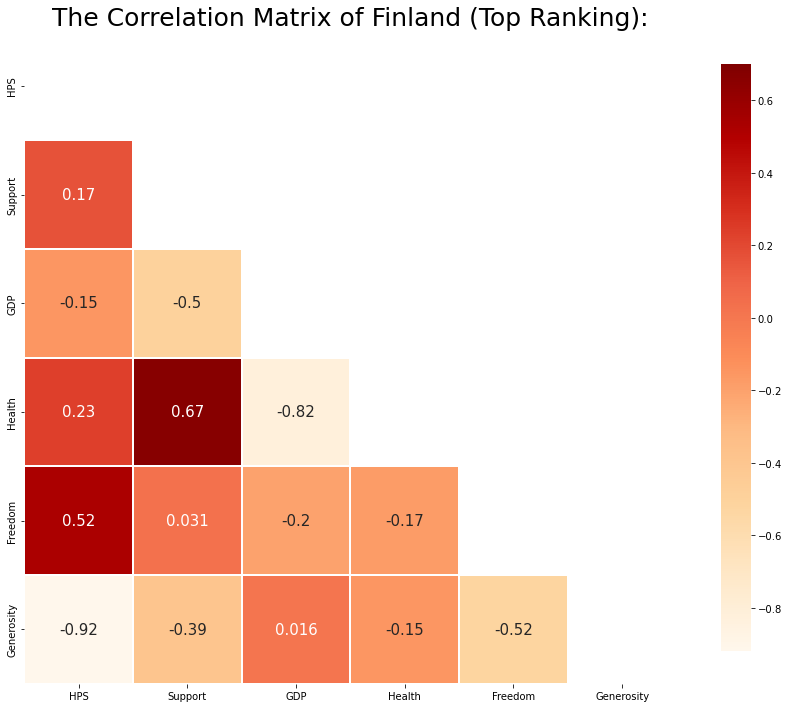

In [24]:
df_finland_drop = df_finland.copy()
df_finland_drop.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
mask = np.zeros_like(df_finland_drop.corr()) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (16, 12))
plt.title('The Correlation Matrix of Finland (Top Ranking):',fontsize = 25)
seabornInstance.heatmap(df_finland_drop.corr(),
                        linewidths=0.25,vmax=0.7,square=True, cmap="OrRd", 
            linecolor='w',annot=True,annot_kws={"size":15},mask=mask,cbar_kws={"shrink": .9});

In [25]:
get_denmark = ['Denmark']
df_denmark = finaldata[(finaldata['Countries'].isin(get_denmark))].sort_values(['Rank','Year'])

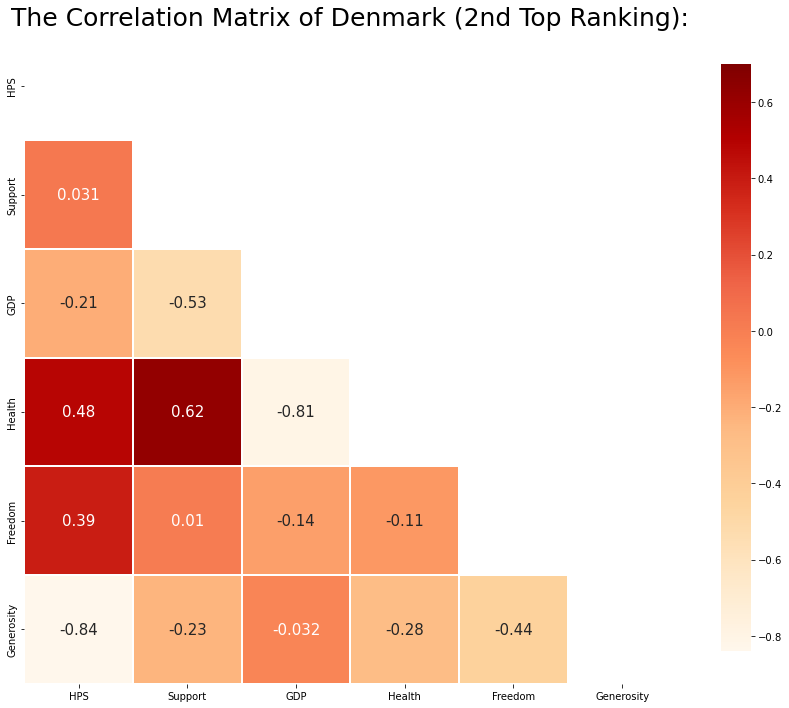

In [26]:
df_denmark_drop = df_denmark.copy()
df_denmark_drop.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
mask = np.zeros_like(df_denmark_drop.corr()) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (16, 12))
plt.title('The Correlation Matrix of Denmark (2nd Top Ranking):',fontsize = 25)
seabornInstance.heatmap(df_denmark_drop.corr(),
                        linewidths=0.25,vmax=0.7,square=True, cmap="OrRd", 
            linecolor='w',annot=True,annot_kws={"size":15},mask=mask,cbar_kws={"shrink": .9});

### The Statistics of Happiness with Categories:
- H = Happiness State (more than 5)
- S = Sad State (Less than 3)
- N = Normal State (In middle of 3 & 5)

In [27]:
HPS_Score = pd.DataFrame(finaldata["HPS"])
happiness = []
for i in HPS_Score["HPS"]:
    if i < 3:
        happiness.append("S")
    elif 3 <= i <= 5:
        happiness.append("N")
    else:
        happiness.append("H")
        
pred_happiness = pd.DataFrame(happiness, columns=["Predicted_Happiness"])
pred_happiness = pd.DataFrame(pred_happiness["Predicted_Happiness"].astype('category'))
finaldata = pd.concat([finaldata, pred_happiness], axis=1)

finaldata = finaldata.loc[:, ~finaldata.columns.duplicated()]
finaldata

,Countries,Rank,HPS,Support,GDP,Health,Freedom,Generosity,Corruption,Year,target,target_n,Predicted_Happiness
0,Switzerland,1,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015,Top,4,H
1,Finland,1,7.7690,1.587000,1.340000,0.986000,0.596000,0.153000,0.393000,2019,Top,4,H
2,Denmark,1,7.5260,1.163740,1.441780,0.795040,0.579410,0.444530,0.361710,2016,Top,4,H
3,Finland,1,7.8087,1.499526,1.285190,0.961271,0.662317,0.159670,0.477857,2020,Top,4,H
4,Norway,1,7.5370,1.533524,1.616463,0.796667,0.635423,0.362012,0.315964,2017,Top,4,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,Syria,156,3.0060,0.663200,0.474890,0.721930,0.156840,0.189060,0.471790,2015,Low,1,N
1080,South Sudan,156,2.8530,0.575000,0.306000,0.295000,0.010000,0.202000,0.091000,2019,Low,1,S
1081,Burundi,157,2.9050,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270,2015,Low,1,S
1082,Burundi,157,2.9050,0.234420,0.068310,0.157470,0.043200,0.094190,0.202900,2016,Low,1,S


## Counting of Happiness (All Countries):

In [28]:
finaldata["Predicted_Happiness"].value_counts()

H    685
N    389
S     10
Name: Predicted_Happiness, dtype: int64

<AxesSubplot:title={'center':'Count of Happiness from each Countries (In Total)'}, xlabel='Predicted_Happiness', ylabel='count'>

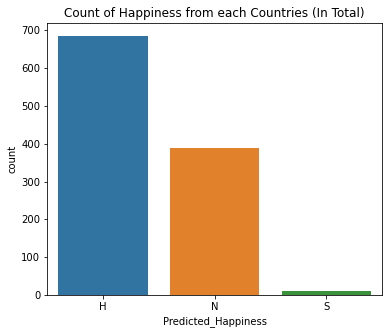

In [29]:
x = finaldata.Predicted_Happiness
fig = plt.figure(figsize=(6, 5))
plt.title('Count of Happiness from each Countries (In Total)', fontsize=12)
seabornInstance.countplot(x=x, linewidth=5)

## Relationship of Factors with each other (All Countries):

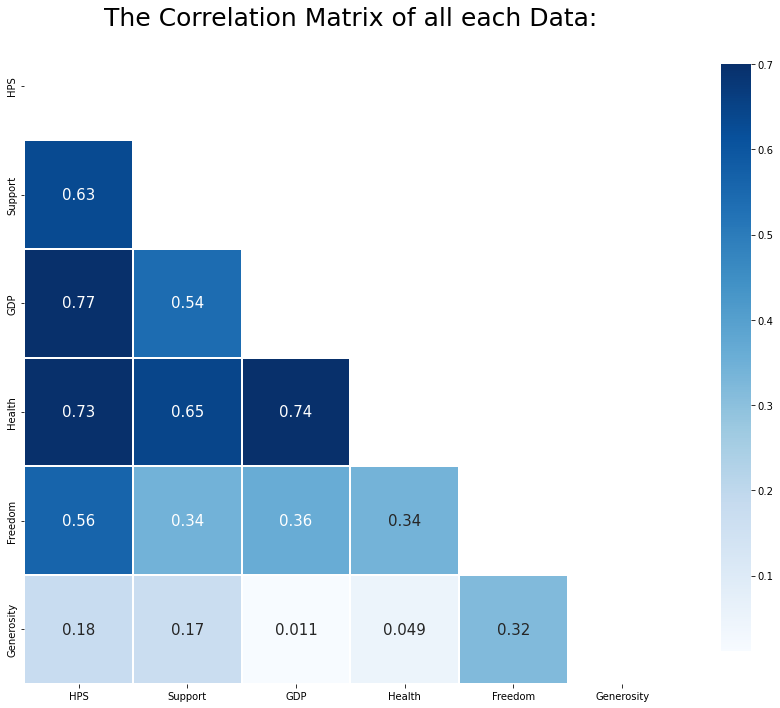

In [30]:
finaldata_clean = finaldata.copy()
finaldata_clean.drop(['Rank', 'Corruption', 'Year'], axis=1, inplace = True)
mask = np.zeros_like(finaldata_clean.corr()) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (16, 12))
plt.title('The Correlation Matrix of all each Data:',fontsize = 25)
seabornInstance.heatmap(finaldata_clean.corr(),
                        linewidths=0.25,vmax=0.7,square=True,cmap="Blues", 
            linecolor='w',annot=True,annot_kws={"size":15},mask=mask,cbar_kws={"shrink": .9});

## Correlation of Dataset 2015:

<AxesSubplot:>

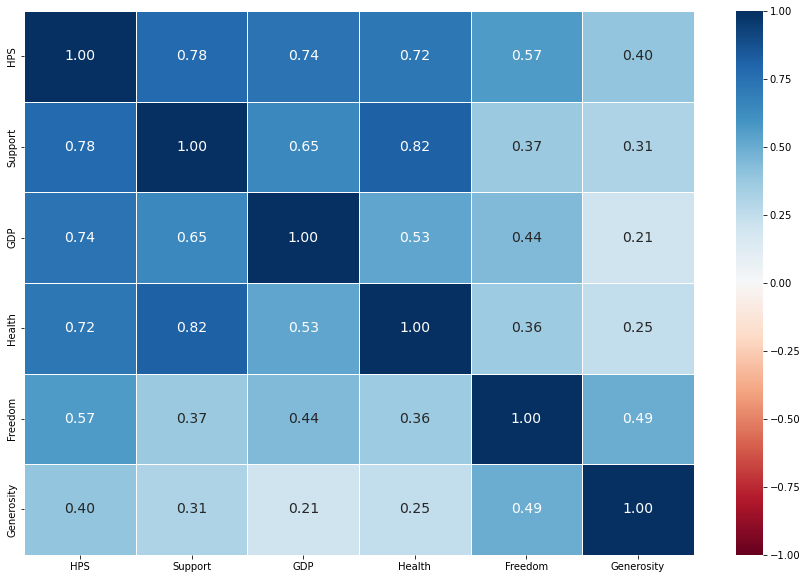

In [31]:
df2015_clean = df2015.copy()
df2015_clean.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
f = plt.figure(figsize=(15, 10))
seabornInstance.heatmap(df2015_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

## Correlation of Dataset 2016:

<AxesSubplot:>

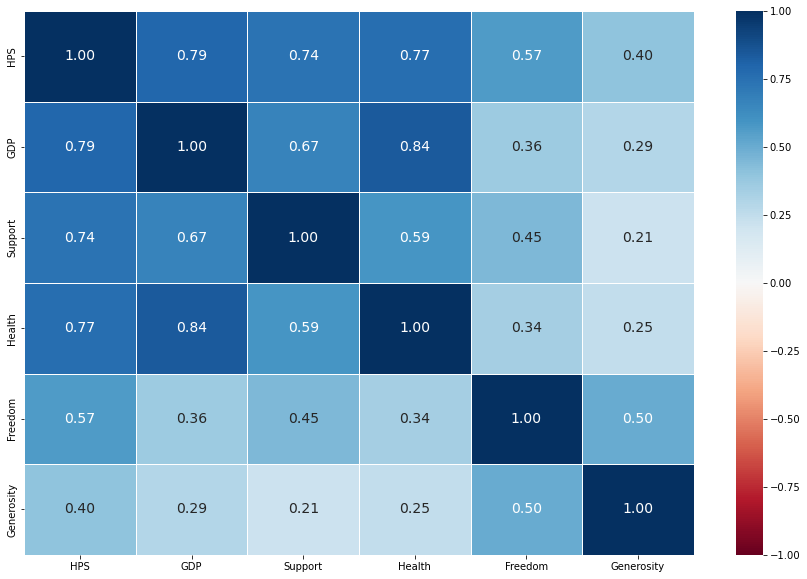

In [32]:
df2016_clean = df2016.copy()
df2016_clean.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
f = plt.figure(figsize=(15, 10))
seabornInstance.heatmap(df2016_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

## Correlation of Dataset 2017:

<AxesSubplot:>

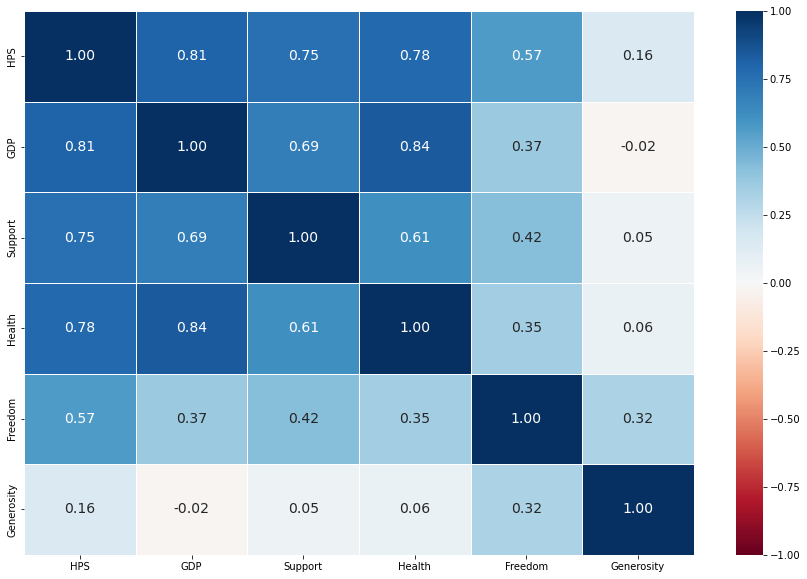

In [33]:
df2017_clean = df2017.copy()
df2017_clean.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
f = plt.figure(figsize=(15, 10))
seabornInstance.heatmap(df2017_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

## Correlation of Dataset 2018:

<AxesSubplot:>

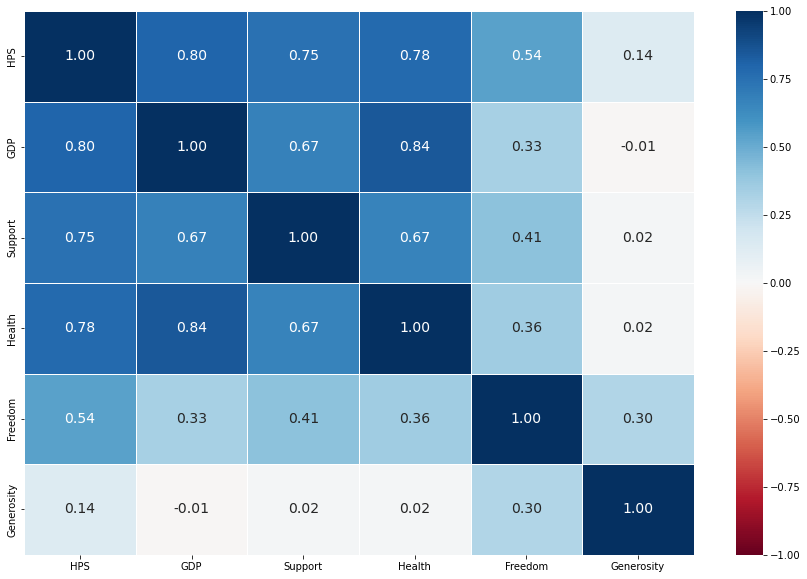

In [34]:
df2018_clean = df2018.copy()
df2018_clean.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
f = plt.figure(figsize=(15, 10))
seabornInstance.heatmap(df2018_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

## Correlation of Dataset 2019:

<AxesSubplot:>

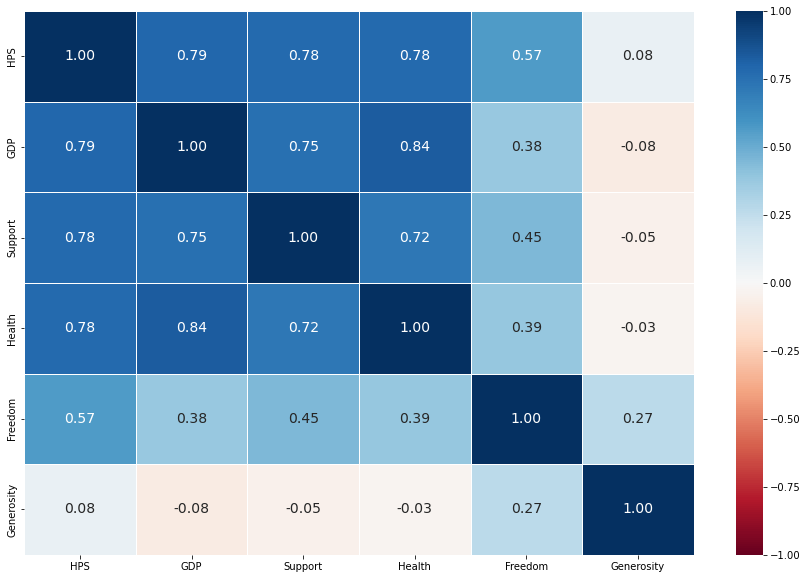

In [35]:
df2019_clean = df2019.copy()
df2019_clean.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
f = plt.figure(figsize=(15, 10))
seabornInstance.heatmap(df2019_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

## Correlation of Dataset 2020:

<AxesSubplot:>

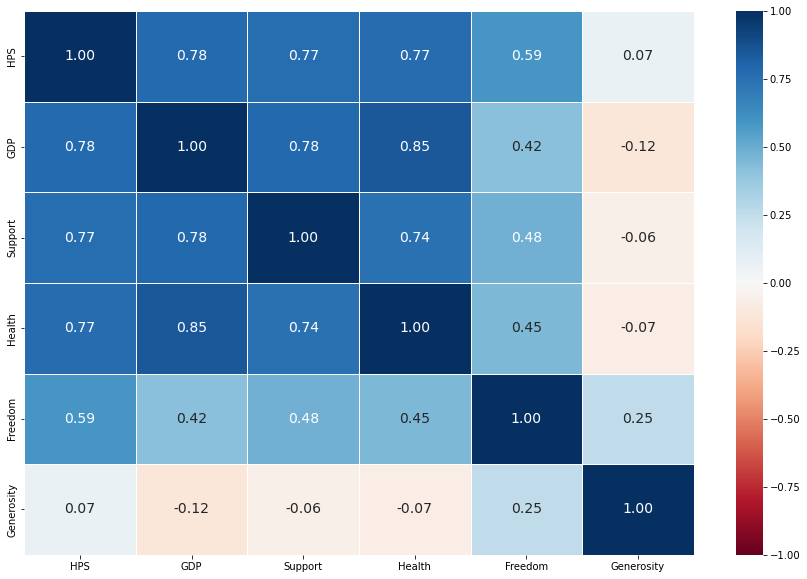

In [36]:
df2020_clean = df2020.copy()
df2020_clean.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
f = plt.figure(figsize=(15, 10))
seabornInstance.heatmap(df2020_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

## Correlation of Dataset 2021:

<AxesSubplot:>

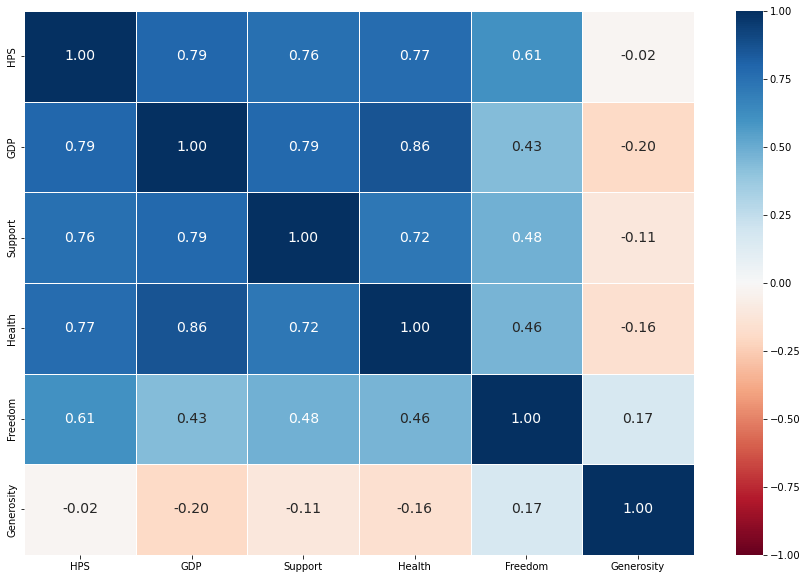

In [37]:
df2021_clean = df2021.copy()
df2021_clean.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
f = plt.figure(figsize=(15, 10))
seabornInstance.heatmap(df2021_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

## Statistics chart for each factor of their top countries (Base on Top 3):

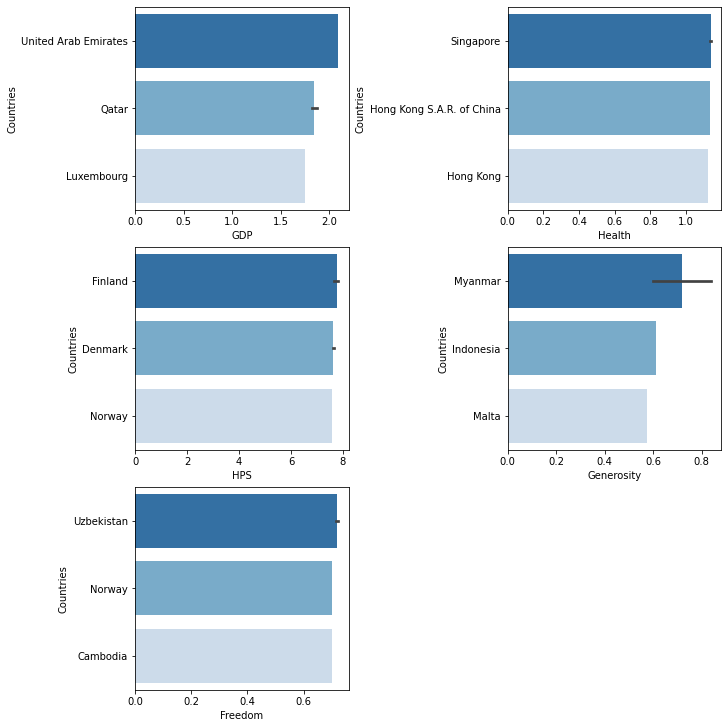

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(10,10))
seabornInstance.barplot(x='GDP',y='Countries',
                        data=finaldata.nlargest(4,'GDP'),
                        ax=axes[0,0],palette="Blues_r")
seabornInstance.barplot(x='Health' ,y='Countries',
                        data=finaldata.nlargest(4,'Health'),
                        ax=axes[0,1],palette='Blues_r')
seabornInstance.barplot(x='HPS' ,y='Countries',
                        data=finaldata.nlargest(8,'HPS'),
                        ax=axes[1,0],palette='Blues_r')
seabornInstance.barplot(x='Generosity' ,y='Countries',
                        data=finaldata.nlargest(4,'Generosity'),
                        ax=axes[1,1],palette='Blues_r')
seabornInstance.barplot(x='Freedom' ,y='Countries',
                        data=finaldata.nlargest(4,'Freedom'),
                        ax=axes[2,0],palette='Blues_r')
axes[2,1].set_axis_off()

## Construct Model for Predict Happiness with (Happiness Score among other countries):

> Usage of **Random Forest Classifier** Regression

In [39]:
# Attribute of World Happiness Dataset (6 variables)
predictors=["Freedom", "GDP", "Health", "Support", "Generosity"]
X = pd.DataFrame(finaldata[predictors])
y = pd.DataFrame(finaldata["Predicted_Happiness"])

# Split the Dataset into Train and Test with a test size of 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

forest = RandomForestClassifier(n_estimators = 80, random_state = 42, max_depth = 10, min_samples_split = 0.1, min_samples_leaf = 0.0001)
forest.fit(X_train, y_train.values.ravel())

# Predict Happiness using Random Forest Classifier
y_train_pred_forest = forest.predict(X_train)
y_test_pred_forest = forest.predict(X_test)

# Check the Goodness of Fit (by Random Forest Classifier)
print("Goodness of Fit by using Random Forest Classifier:")
print("\tPrediction accuracy on Train Set: ", round(forest.score(X_train, y_train), 2))
print("\tPrediction accuracy on Test Set: ", round(forest.score(X_test, y_test), 2))
print("\tClassification Accuracy:", round(forest.score(X_train, y_train, sample_weight = None), 2))

Goodness of Fit by using Random Forest Classifier:
	Prediction accuracy on Train Set:  0.88
	Prediction accuracy on Test Set:  0.88
	Classification Accuracy: 0.88


As observed values of Goodness of Fit, we can say that the Random Forest Classifier algorithm is very powerful. We can get an accuracy of up to 88% on the test data.

In [40]:
x = finaldata[["Freedom", "GDP", "Health", "Support", "Generosity"]]
y = finaldata["HPS"]
scaler = StandardScaler()
scaler.fit(x)
x_standard = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.2, random_state=10)

linreg = LinearRegression()
linreg.fit(x_train, y_train)
print("Train set R^2 (Explained Variance):", linreg.score(x_train, y_train))
print("Test set R^2 (Explained Variance):", linreg.score(x_test, y_test))

Train set R^2 (Explained Variance): 0.7463351685719541
Test set R^2 (Explained Variance): 0.757904584522032


As observed values of R^2, the Linear Regression Algorithm is working good with an accuracy of 76% on the test data and higher than the Train Dataset model

# Part 2 - Problem Statement:

The analysis/statistics of Singapore with Top & Bottom Happiness Score Index:

- 1. Extract Singapore from the Data Information, finding out how is comparison against other countries (Top & Bottom Country)?

## Base on the Question 2: 

## Extraction of Dataset (Comparison with Singapore)

> Getting the infomation of **Singapore, Finland (Highest Happiness Score) & Burundi (Lowest Happiness Score)** into the dataframe

In [41]:
# copy finaldata information into new clean_data1
clean_data = finaldata.copy()
clean_data = df2015.append([df2016, df2017, df2018, df2019, df2020, df2021])
clean_data.isnull().any()
data_Year = pd.DataFrame(clean_data["Year"])
clean_data['Year'] = data_Year

clean_data.columns = clean_data.columns.str.replace(".", "", regex=True)
clean_data.columns = clean_data.columns.str.replace(" ", "_", regex=True)
clean_data.replace(' ', '_', regex = True)
clean_data = clean_data.reset_index(drop = True)
clean_data

clean_data = clean_data.set_index('Countries')
clean_data = clean_data.loc[["Singapore"]].sort_index()
clean_data.drop(['target','target_n'], axis = 1, inplace = True) 
clean_data

,Rank,HPS,Support,GDP,Health,Freedom,Generosity,Corruption,Year
Countries,,,,,,,,,
Singapore,24,6.7980,1.521860,1.020000,1.025250,0.542520,0.492100,0.311050,2015
Singapore,22,6.7390,0.867580,1.645550,0.947190,0.487700,0.469870,0.327060,2016
Singapore,26,6.5720,1.353814,1.692278,0.949492,0.549841,0.345966,0.464308,2017
Singapore,34,6.3430,1.451000,1.529000,1.008000,0.631000,0.261000,0.457000,2018
Singapore,34,6.2620,1.463000,1.572000,1.141000,0.556000,0.271000,0.453000,2019
Singapore,31,6.3771,1.395457,1.519580,1.137814,0.635317,0.218771,0.533162,2020
Singapore,32,6.3770,1.019000,1.695000,0.897000,0.664000,0.176000,0.547000,2021


In [42]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,7.0,29.000000,4.932883,22.00000,25.000000,31.000000,33.000000,34.00000
HPS,7.0,6.495443,0.209161,6.26200,6.360000,6.377100,6.655500,6.79800
Support,7.0,1.295959,0.250477,0.86758,1.186407,1.395457,1.457000,1.52186
GDP,7.0,1.524773,0.234056,1.02000,1.524290,1.572000,1.668914,1.69500
Health,7.0,1.015107,0.094804,0.89700,0.948341,1.008000,1.081532,1.14100
Freedom,7.0,0.580911,0.063405,0.48770,0.546180,0.556000,0.633159,0.66400
Generosity,7.0,0.319244,0.122212,0.17600,0.239885,0.271000,0.407918,0.49210
Corruption,7.0,0.441797,0.091777,0.31105,0.390030,0.457000,0.498735,0.54700
Year,7.0,2018.000000,2.160247,2015.00000,2016.500000,2018.000000,2019.500000,2021.00000


### Relationship between HPS (Happiness Score) and Years of Singapore from 2015 - 2021:

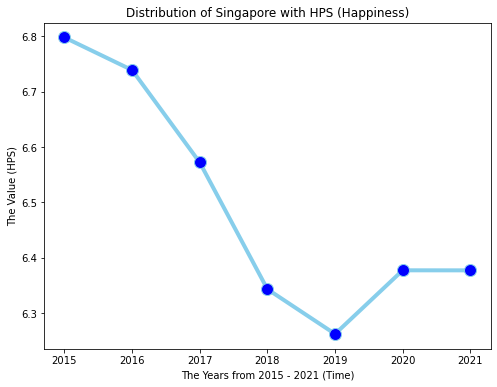

In [43]:
fig = plt.figure(figsize=(8, 6))
plt.plot('Year', 'HPS', data = clean_data.loc['Singapore'], marker='o', markerfacecolor='blue', markersize = 12, color='skyblue', linewidth=4, label="Singapore")
plt.xlabel("The Years from 2015 - 2021 (Time)")
plt.ylabel("The Value (HPS)")
plt.title("Distribution of Singapore with HPS (Happiness)")
plt.show()

### This is the trendline of data statistics for Singapore:

> Base on the line chart above, it can be say that there is a significant drop from 2015 - 2019, but it was up again from 2021.

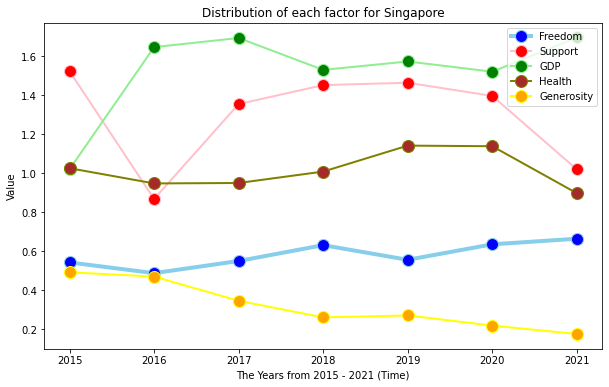

In [50]:
fig = plt.figure(figsize=(10, 6))
plt.plot( 'Year', 'Freedom', data=clean_data.loc["Singapore"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Freedom")
plt.plot( 'Year', 'Support', data=clean_data.loc["Singapore"], marker='o', markerfacecolor='red', markersize=12, color='pink', linewidth=2, label="Support")
plt.plot( 'Year', 'GDP', data=clean_data.loc["Singapore"], marker='o', markerfacecolor='green', markersize=12, color='lightgreen', linewidth=2, label="GDP")
plt.plot( 'Year', 'Health', data=clean_data.loc["Singapore"], marker='o', markerfacecolor='brown', markersize=12, color='olive', linewidth=2, label="Health")
plt.plot( 'Year', 'Generosity', data=clean_data.loc["Singapore"], marker='o', markerfacecolor='orange', markersize=12, color='yellow', linewidth=2, label="Generosity")
plt.xlabel("The Years from 2015 - 2021 (Time)")
plt.ylabel("Value")
plt.title("Distribution of each factor for Singapore")
plt.legend()

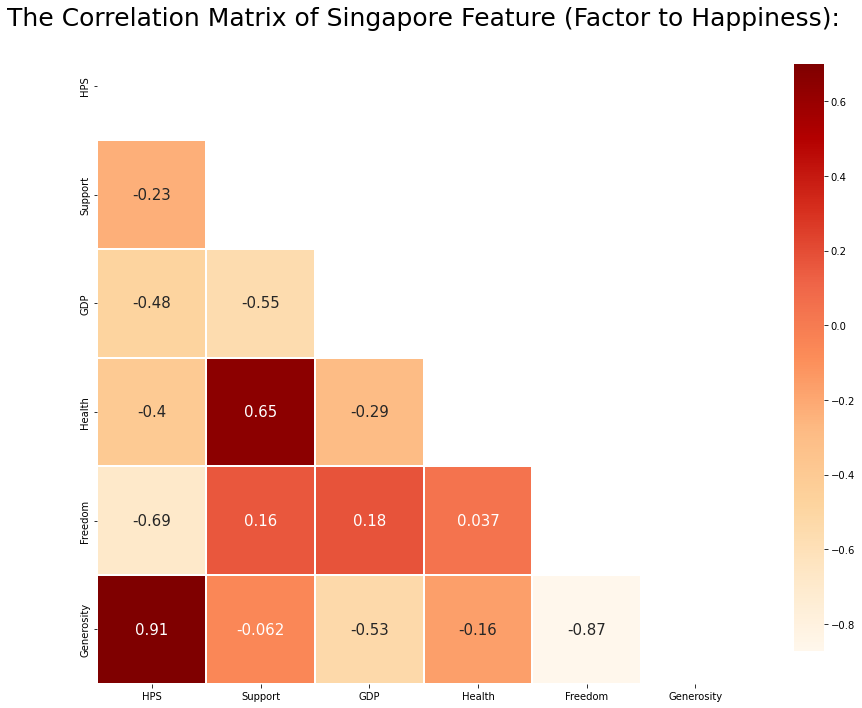

In [45]:
clean_data_drop = clean_data.copy()
clean_data_drop.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
mask = np.zeros_like(clean_data_drop.corr()) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (16, 12))
plt.title('The Correlation Matrix of Singapore Feature (Factor to Happiness):',fontsize = 25)
seabornInstance.heatmap(clean_data_drop.corr(),
                        linewidths=0.25,vmax=0.7,square=True, cmap="OrRd", 
            linecolor='w',annot=True,annot_kws={"size":15},mask=mask,cbar_kws={"shrink": .9});

### Comparison of 3 Countries using the Bar Graph:

In [46]:
# copy clean_data information into new clean_data1
clean_data1 = clean_data.copy()
clean_data1 = df2015.append([df2016, df2017, df2018, df2019, df2020, df2021])
clean_data1.isnull().any()

clean_data1.columns = clean_data1.columns.str.replace(".", "", regex=True)
clean_data1.columns = clean_data1.columns.str.replace(" ", "_", regex=True)
clean_data1.replace(' ', '_', regex=True)

clean_data1 = clean_data1.set_index('Countries')
clean_data1 = clean_data1.loc[["Singapore", 'Burundi', 'Finland']].sort_index()
clean_data1.drop(['target','target_n'], axis = 1, inplace = True) 
clean_data1

,Rank,HPS,Support,GDP,Health,Freedom,Generosity,Corruption,Year
Countries,,,,,,,,,
Burundi,156,2.9050,0.627000,0.091000,0.145000,0.065000,0.149000,0.076000,2018
Burundi,140,3.7750,0.062000,0.000000,0.155000,0.298000,0.172000,0.212000,2021
Burundi,157,2.9050,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270,2015
Burundi,157,2.9050,0.234420,0.068310,0.157470,0.043200,0.094190,0.202900,2016
Burundi,154,2.9050,0.629794,0.091623,0.151611,0.059901,0.204435,0.084148,2017
Burundi,140,3.7753,0.403575,0.000000,0.295213,0.275399,0.187402,0.212187,2020
Burundi,145,3.7750,0.447000,0.046000,0.380000,0.220000,0.176000,0.180000,2019
Finland,1,7.7690,1.587000,1.340000,0.986000,0.596000,0.153000,0.393000,2019
Finland,1,7.6320,1.592000,1.305000,0.874000,0.681000,0.202000,0.393000,2018


### Comparison of Statistics: All of the Contribute Factors with Singapaore (Base on the Countries):

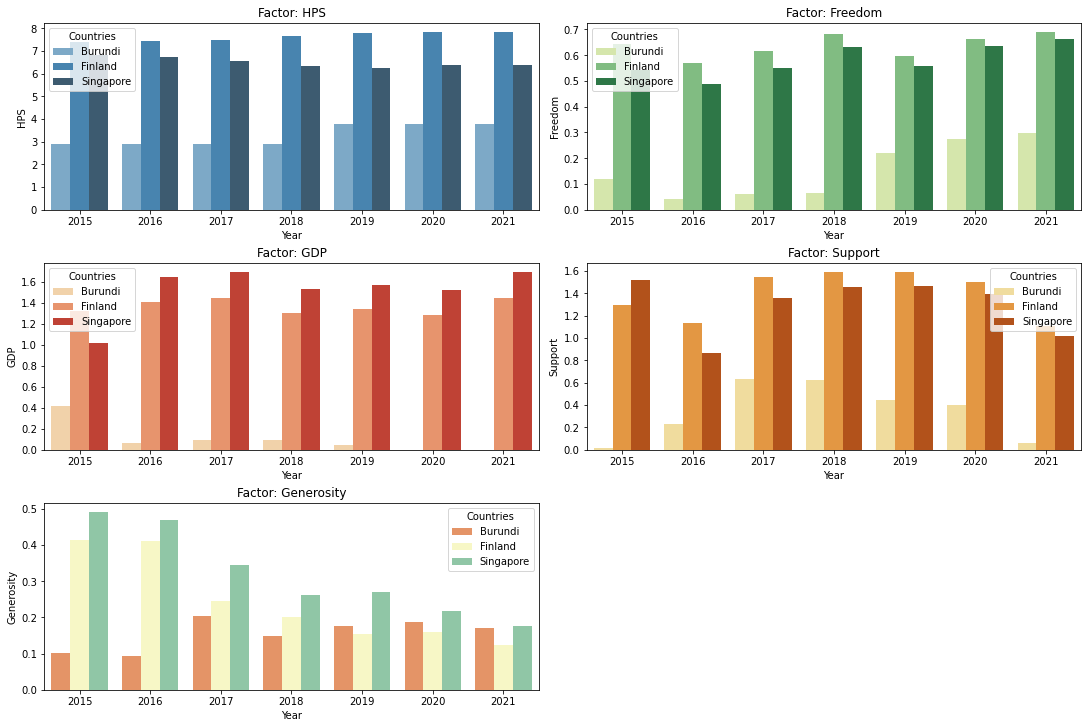

In [47]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, constrained_layout=True, figsize=(15, 10))
seabornInstance.barplot(x='Year', y='HPS', hue=clean_data1.index, data = clean_data1,ax=axes[0,0], palette="Blues_d").set(title='Factor: HPS')
seabornInstance.barplot(x='Year', y='Freedom', hue=clean_data1.index, data = clean_data1,ax=axes[0,1], palette="YlGn").set(title='Factor: Freedom')
seabornInstance.barplot(x='Year', y='GDP', hue=clean_data1.index, data = clean_data1,ax=axes[1,0], palette="OrRd").set(title='Factor: GDP')
seabornInstance.barplot(x='Year', y='Support', hue=clean_data1.index, data = clean_data1,ax=axes[1,1], palette="YlOrBr").set(title='Factor: Support')
seabornInstance.barplot(x='Year', y='Generosity', hue=clean_data1.index, data = clean_data1,ax=axes[2,0], palette="Spectral").set(title='Factor: Generosity')
axes[2,1].set_axis_off()

<AxesSubplot:>

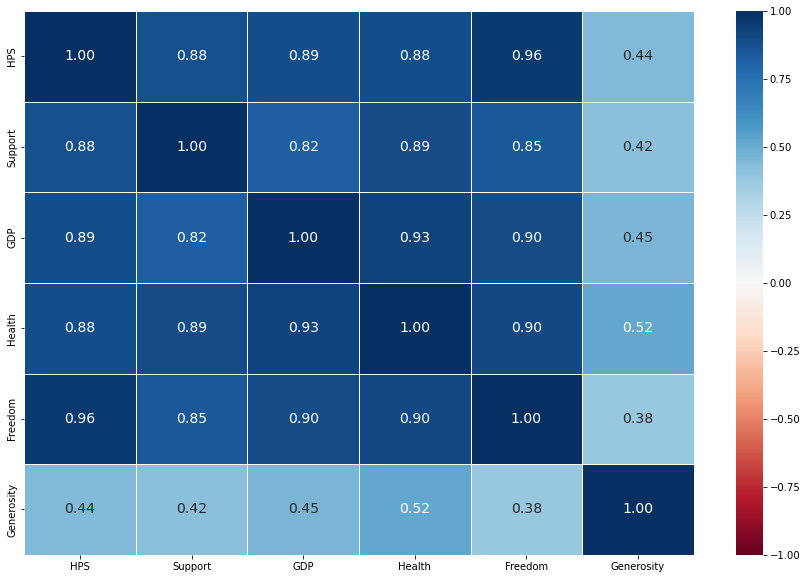

In [48]:
clean_data1_drop = clean_data1.copy()
clean_data1_drop.drop(['Rank','Corruption','Year'], axis=1, inplace = True)
f = plt.figure(figsize=(15, 10))
seabornInstance.heatmap(clean_data1_drop.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

In [49]:
x1 = clean_data1_drop[["Freedom", "GDP", "Health", "Support", "Generosity"]]
y1 = clean_data1_drop["HPS"]
scaler = StandardScaler()
scaler.fit(x1)
x1_standard = scaler.transform(x1)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1_standard, y1, test_size = 0.20, random_state = 10)

linreg1 = LinearRegression()
linreg1.fit(x1_train, y1_train)

y1_train_pred = linreg1.predict(x1_train)
y1_test_pred = linreg1.predict(x1_test)

print("Train set R^2 (Explained Variance):", linreg1.score(x1_train, y1_train))
print("Test set R^2 (Explained Variance):", linreg1.score(x1_test, y1_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_train, y1_train_pred))

Train set R^2 (Explained Variance): 0.9568855454819747
Test set R^2 (Explained Variance): 0.8831548856015339
Mean Squared Error (MSE) 	: 0.14436630729441072
